# "Tidy Data & Visualisation with R" course to python, part II: vsualisation
* Online course resource in R [link](https://rmagno.eu/tdvr.oct.22/).
* This is a test by someone which has never seen R code before
* I follow the notation and try to reproduct the functionality
* I have not run any of the R codes, so outputs might not match.
* R codes are put as a comments

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style()

## Exercise 3.1: Loading data

In [2]:
# data_tidy_path <- here::here("data-tidy")
# quadrats <- readRDS(file = file.path(data_tidy_path, "quadrats.rds"))
# crabs <- readRDS(file = file.path(data_tidy_path, "crabs.rds"))

## loading
data_tidy_path = os.getcwd() + '/data-tidy'

quadrats = pd.read_csv(f"{data_tidy_path}/quadrats.csv")
crabs = pd.read_csv(f"{data_tidy_path}/crabs.csv")

In [3]:
crabs.species.value_counts()

species
Uca olhanensis       3740
Afruca farensis      2520
Ucides alvorensis    1066
Name: count, dtype: int64

## Exercise 3.2: What is the most abundant crab species?
**R code**
```
nr_crabs_by_species <- count(crabs, species)
ggplot(data = nr_crabs_by_species, mapping = aes(x = species, y = n)) + geom_col()
```

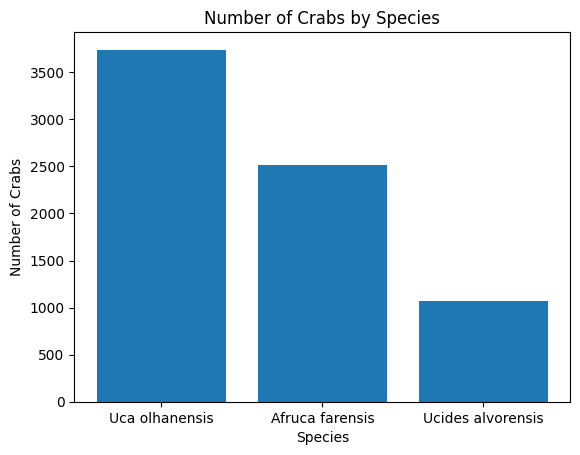

In [4]:
# matplotlib
nr_crabs_by_species = crabs['species'].value_counts().reset_index()
nr_crabs_by_species.columns = ['species', 'n']

plt.bar(nr_crabs_by_species.species, nr_crabs_by_species.n)
plt.xlabel('Species')
plt.ylabel('Number of Crabs')
plt.title('Number of Crabs by Species')
plt.show()

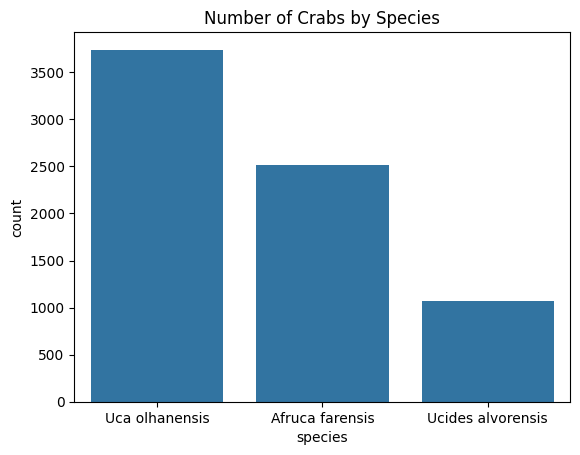

In [5]:
# seaborn
sns.barplot(crabs['species'].value_counts())
plt.title('Number of Crabs by Species')
plt.show()

**Conclusions**: 
* Plotting out of the `pandas` DFs is easier with `seaborn`
* `Seaborn` is built on top of `matplotlib`, so methods can be reused, such as `plt.xlabel()`

## Exercise 3.3: What are the abundances of each sex?
**R code**
```
nr_crabs_by_sex <- count(crabs, sex)
ggplot(data = nr_crabs_by_sex, mapping = aes(x = sex, y = n)) + geom_col()
```

In [6]:
# even though the Nan values are in the series, they are not shown on the plot below
# This feels like a bug
crabs['sex'].value_counts(dropna=False)

sex
male      3590
female    3510
NaN        226
Name: count, dtype: int64

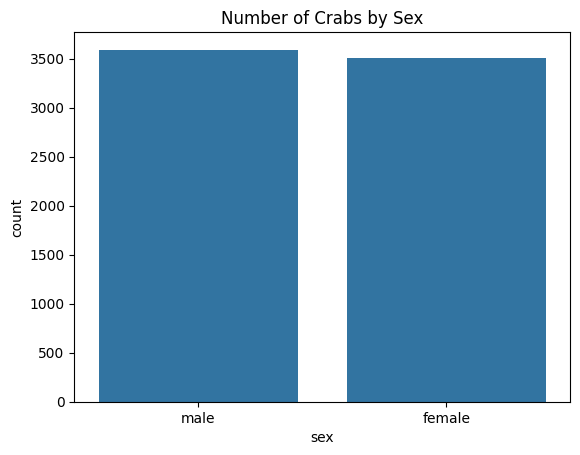

In [7]:
# seaborn
sns.barplot(crabs['sex'].value_counts(dropna=False))
plt.title('Number of Crabs by Sex')
plt.show()

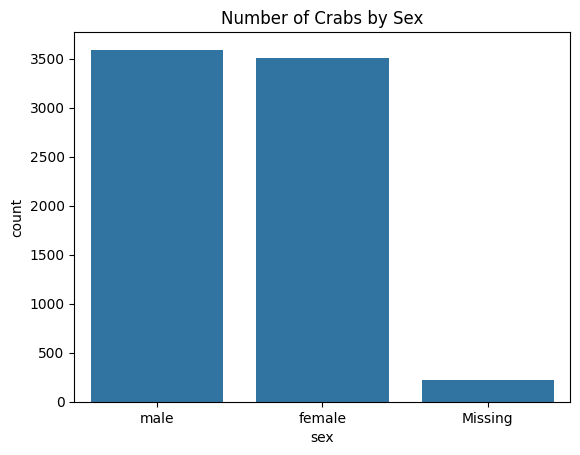

In [8]:
# One needs to fill the Nans first.
sns.barplot(crabs['sex'].fillna('Missing').value_counts())
plt.title('Number of Crabs by Sex')
plt.show()

## Exercise 3.4: Can you visually show the crab abundance by species and sex in the same plot?

**R code**
```
nr_crabs_by_sp_sex <- count(crabs, species, sex)
ggplot(data = nr_crabs_by_sp_sex, mapping = aes(x = species, y = n, fill = sex)) + geom_col()
```

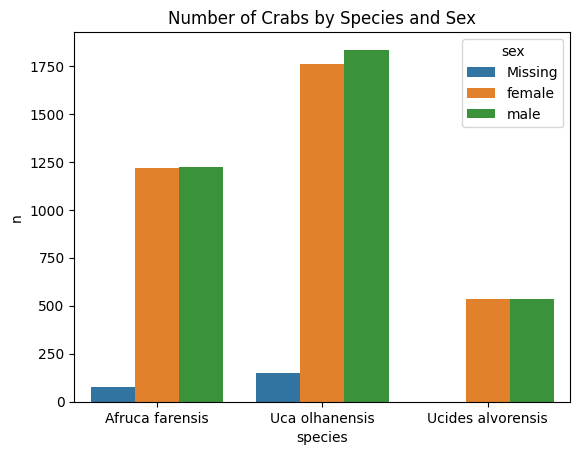

In [9]:
# Count the number of crabs by species and sex
sns.set_style()
crabs01 = crabs.copy()
crabs01['sex'].fillna('Missing', inplace=True)
nr_crabs_by_sp_sex = crabs01.groupby(['species', 'sex']).size().reset_index(name='n')

# Plotting
sns.barplot(data=nr_crabs_by_sp_sex, x='species', y='n', hue='sex')
plt.title('Number of Crabs by Species and Sex')
plt.show()

### Alternative using catplot

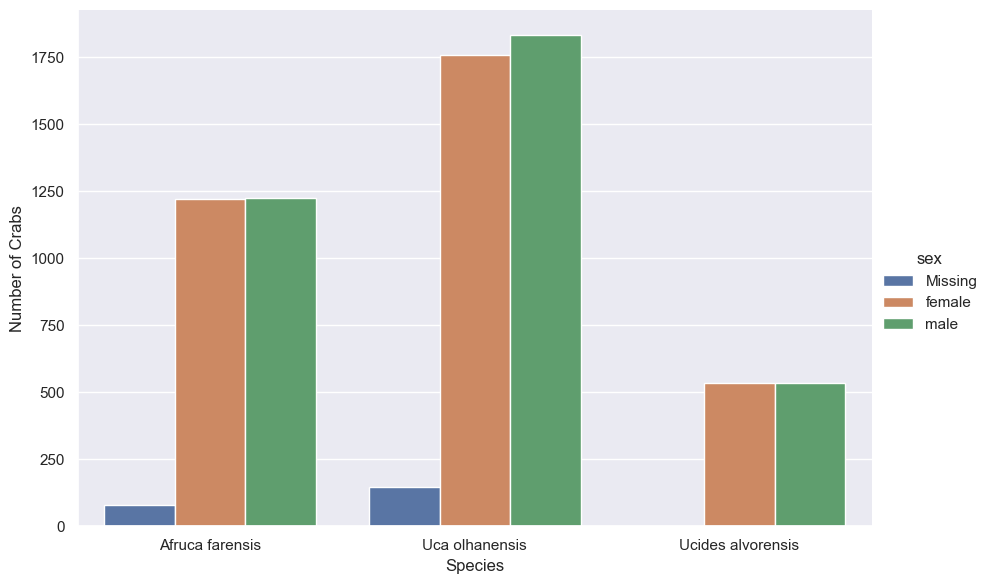

In [10]:
# Plotting with dodge equivalent
sns.set(style="darkgrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex,
    kind="bar",
    x="species",
    y="n",
    hue="sex",
    dodge=True,
    height=6,
    aspect=1.5
)
g.set_axis_labels("Species", "Number of Crabs")
g.set_titles("Number of Crabs by Species and Sex")
plt.show()

## Exercise 3.6
**R code**
```
count(crabs, species, stage) %>%
  ggplot(mapping = aes(x = stage, y = n)) +
  geom_col(position = "dodge2") +
  facet_wrap(vars(species))
```

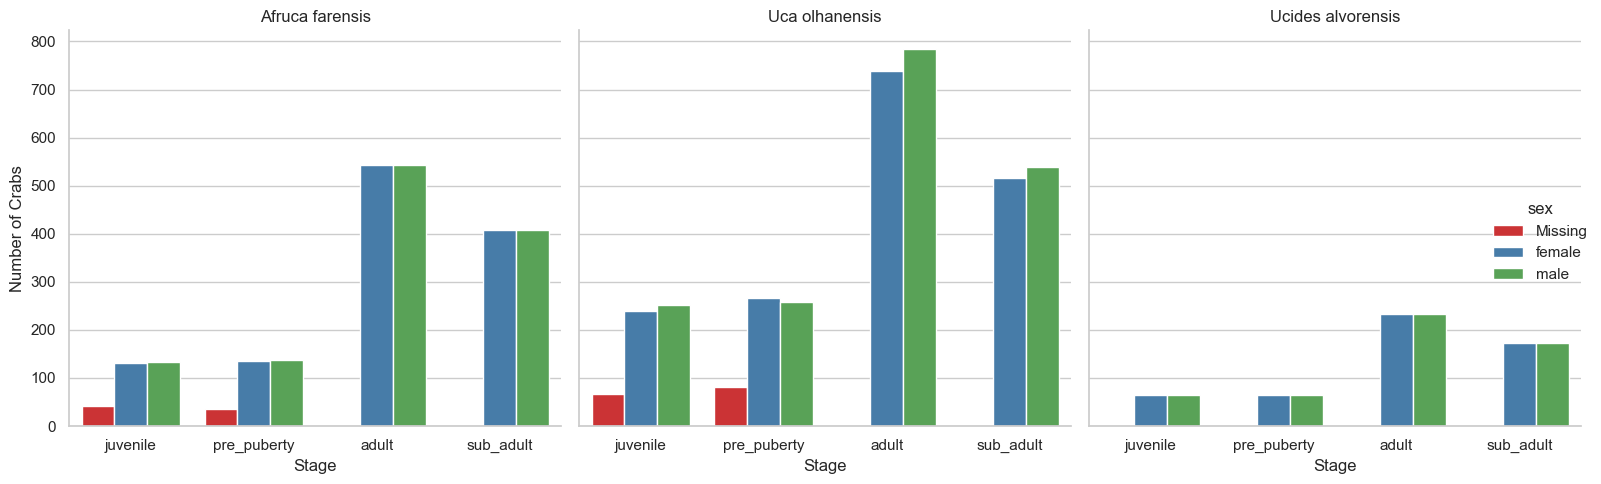

In [11]:
nr_crabs_by_sp_sex_stage = crabs01.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge equivalent
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="stage",
    y="n",
    hue="sex",
    palette="Set1",
    col="species",
    col_wrap=3,
    dodge=True,
    height=5,
    aspect=1.
)
g.set_axis_labels("Stage", "Number of Crabs")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

### Continuation
**R code**
```
ggplot(data = count(crabs, species, sex, stage), mapping = aes(x = sex, y = n, fill = stage)) +
  geom_col(position = position_dodge2(preserve = "single")) +
  facet_wrap(vars(species))
```

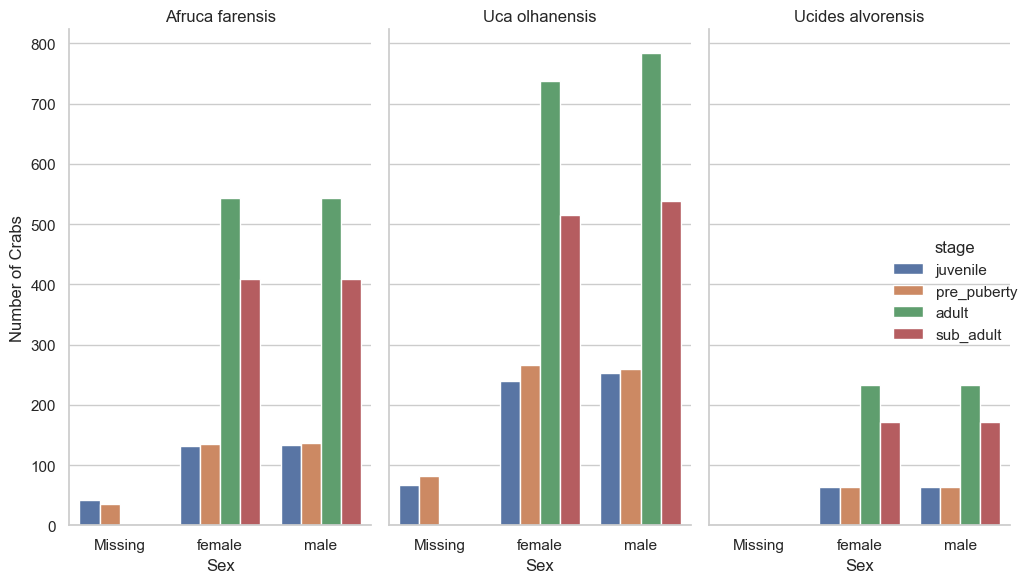

In [12]:
# Count the number of crabs by species, sex, and stage
nr_crabs_by_sp_sex_stage = crabs01.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge2-like positioning and facet_wrap
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="sex",
    y="n",
    hue="stage",
    col="species",
    col_wrap=3,
    dodge=True,
    height=6,
    aspect=0.5
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

## Exercise 3.7
**R code**
```
count(crabs, species, sex, stage, season) %>%
ggplot(mapping = aes(x = sex, y = n, fill = stage)) +
  geom_col(position = position_dodge2(preserve = "single")) +
  facet_grid(rows = vars(season), cols = vars(species))
```

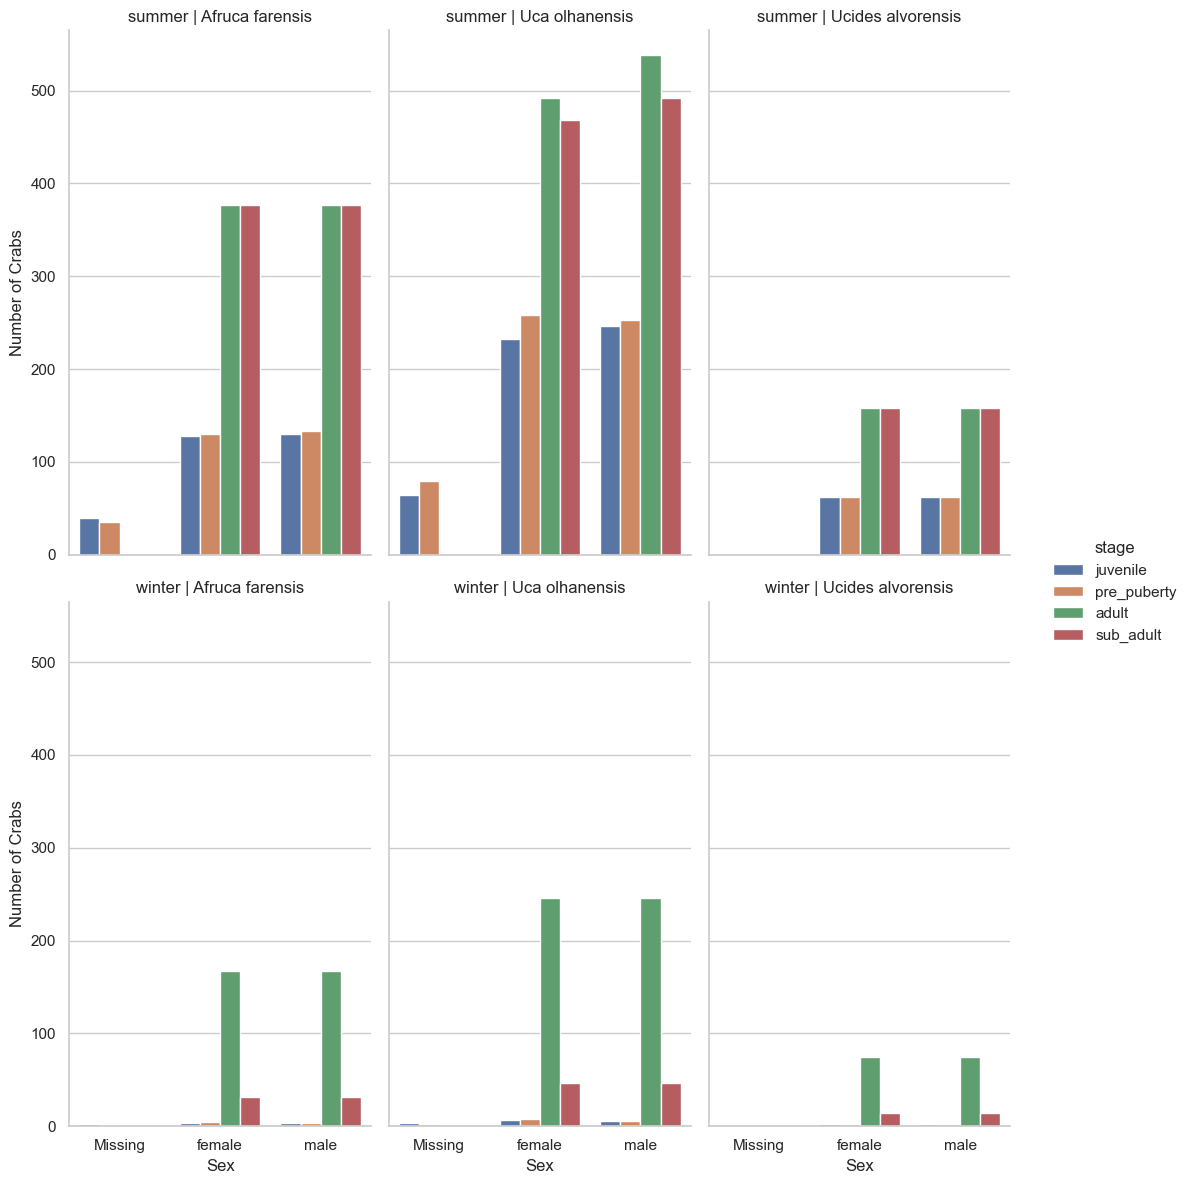

In [13]:
# Count the number of crabs by species, sex, stage, and season
nr_crabs_by_sp_sex_stage_season = crabs01.groupby(['species', 'sex', 'stage', 'season']).size().reset_index(name='n')

# Plotting with dodge2-like positioning and facet_grid
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage_season,
    kind="bar",
    x="sex",
    y="n",
    hue="stage",
    col="species",
    row="season",
    dodge=True,
    height=6,
    aspect=0.5,
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

## Exercise 3.8
**R code**
```
ggplot(data = count(crabs, species, sex, stage, season), mapping = aes(x = sex, y = n, fill = stage)) +
  geom_col(position = position_dodge2(preserve = "single"), na.rm = TRUE) +
  scale_x_discrete(na.translate = FALSE) +
  facet_grid(rows = vars(season), cols = vars(species), scales = "free_y")
```

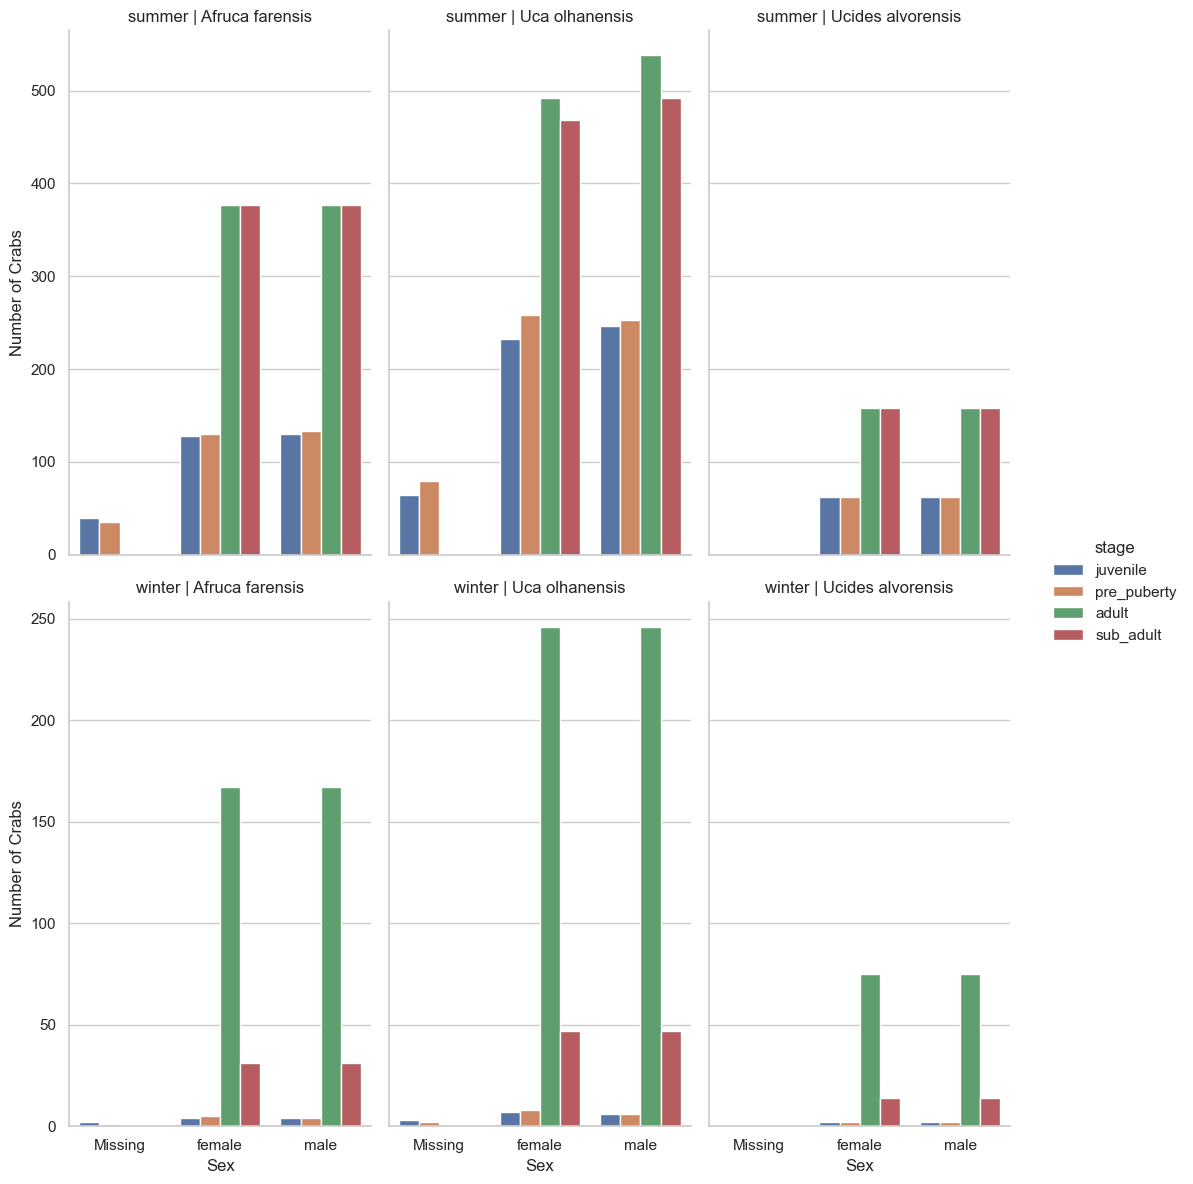

In [14]:
nr_crabs_by_sp_sex_stage_season = crabs01.groupby(['species', 'sex', 'stage', 'season']).size().reset_index(name='n')

# Plotting with dodge2-like positioning and facet_grid with scales="free_y"
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage_season,
    kind="bar",
    x="sex",
    y="n",
    hue="stage",
    col="species",
    row="season",
    dodge=True,
    height=6,
    aspect=0.5,
    sharey='row'  # Ensures scales="free_y"
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

## Exercise 3.9
**R code**
```
count(crabs, species, sex, stage, season) %>%
  group_by(species, season) %>%
  mutate(pct = 100 * n / sum(n, na.rm = TRUE)) %>%
  ggplot(mapping = aes(x = sex, y = pct, fill = stage)) +
  geom_col(position = position_dodge2(preserve = "single"), na.rm = TRUE) +
  scale_x_discrete(na.translate = FALSE) +
  facet_grid(rows = vars(season), cols = vars(species), scales = "free_y")
```

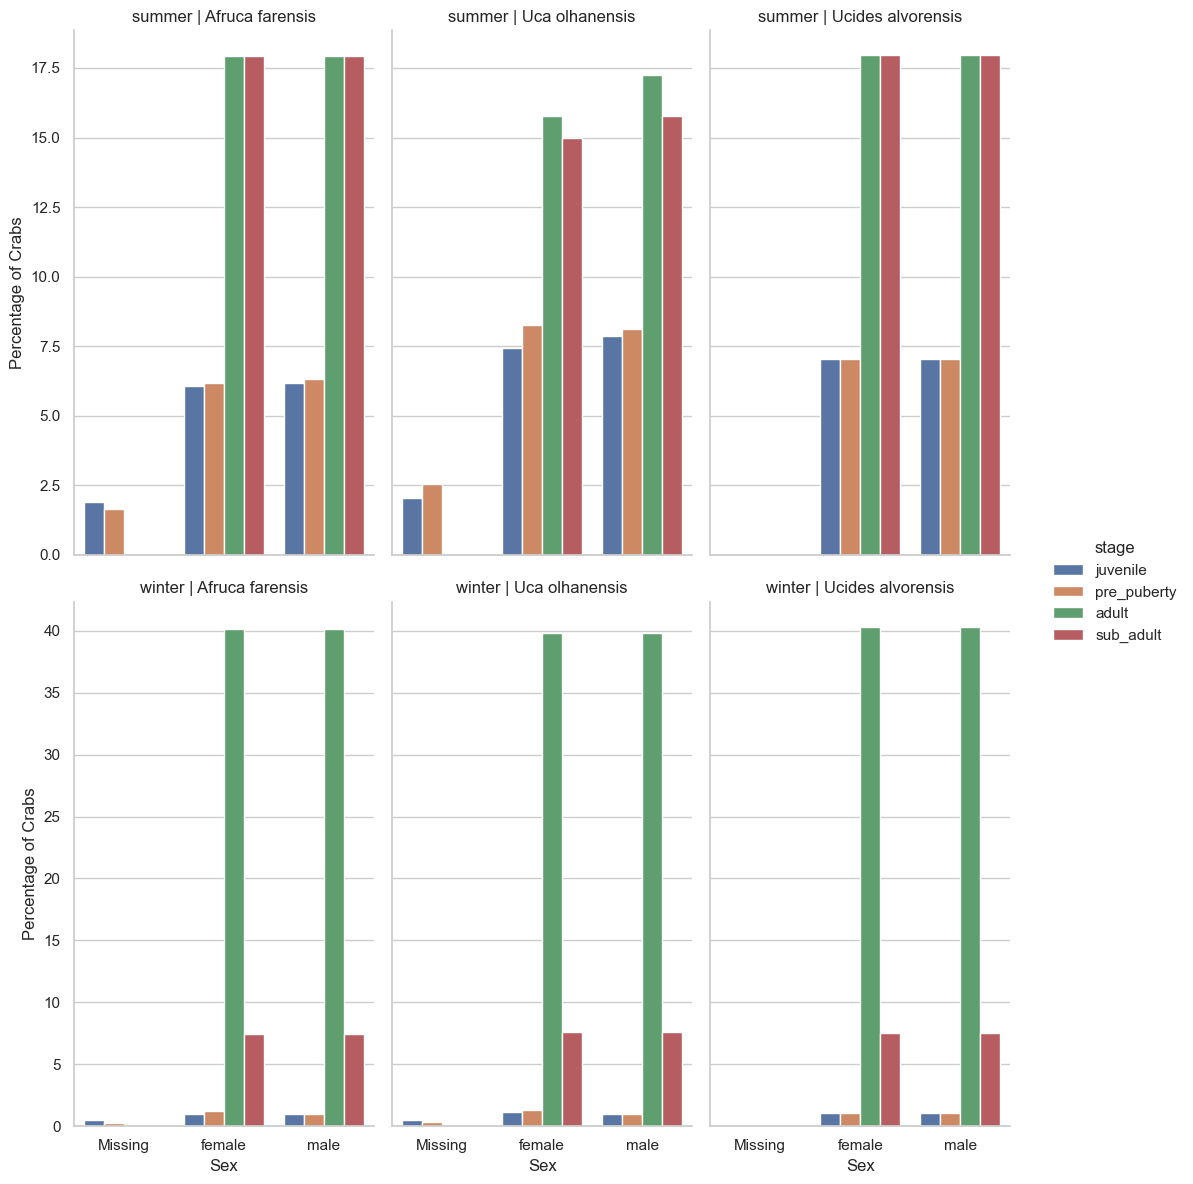

In [15]:
# Count the number of crabs by species, sex, stage, and season
nr_crabs_by_sp_sex_stage_season = crabs01.groupby(['species', 'sex', 'stage', 'season']).size().reset_index(name='n')

# Calculate percentage within each species and season
nr_crabs_by_sp_sex_stage_season['pct'] = (
    nr_crabs_by_sp_sex_stage_season.groupby(['species', 'season'])['n']
    .transform(lambda x: 100 * x / x.sum())
)

# Plotting with dodge2-like positioning and facet_grid with scales="free_y"
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage_season,
    kind="bar",
    x="sex",
    y="pct",
    hue="stage",
    col="species",
    row="season",
    dodge=True,
    height=6,
    aspect=0.5,
    sharey='row'  # Ensures scales="free_y"
)
g.set_axis_labels("Sex", "Percentage of Crabs")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

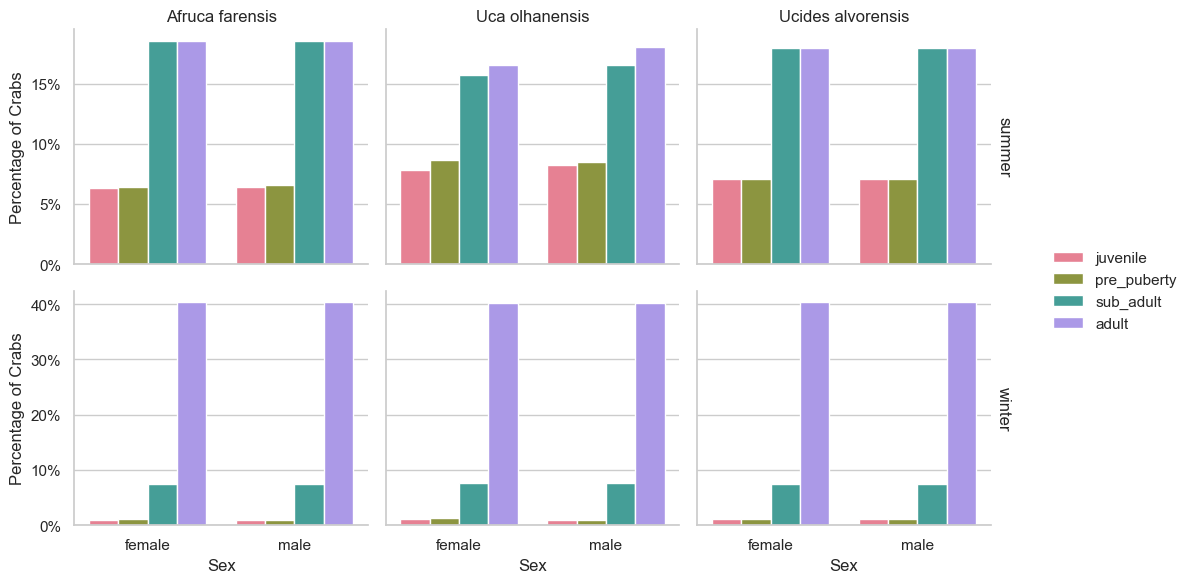

In [16]:
# Version 2
# Count the number of crabs by species, sex, stage, and season
nr_crabs_by_sp_sex_stage_season = crabs.groupby(['species', 'sex', 'stage', 'season']).size().reset_index(name='n')

# Calculate percentage within each species and season
nr_crabs_by_sp_sex_stage_season['pct'] = (
    nr_crabs_by_sp_sex_stage_season.groupby(['species', 'season'])['n']
    .transform(lambda x: 100 * x / x.sum())
)

# Define custom labels
sex_labels = {"F": "Female", "M": "Male"}
stage_labels = ["juvenile", "pre_puberty", "sub_adult", "adult"]

# Plotting with dodge2-like positioning and facet_grid with scales="free_y"
sns.set(style="whitegrid")
# Initialize the FacetGrid object with row and col parameters
g = sns.FacetGrid(
    data=nr_crabs_by_sp_sex_stage_season,
    col="species",
    row="season",
    margin_titles=True,
    sharey='row'  # Ensures scales="free_y"
)

g.map_dataframe(
    sns.barplot,
    x="sex",
    y="pct",
    hue="stage",
    order=["female", "male"],
    hue_order=stage_labels,
    dodge=True,
    palette=sns.color_palette("husl", len(stage_labels))
)

# Apply percentage formatting to y-axis labels
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100:.0%}'))

# legend
g.add_legend()
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
g.set_axis_labels("Sex", "Percentage of Crabs")

g.set_titles(row_template="{row_name}", col_template="{col_name}")
plt.tight_layout()
plt.show()

## Making different plot styles
### Violin

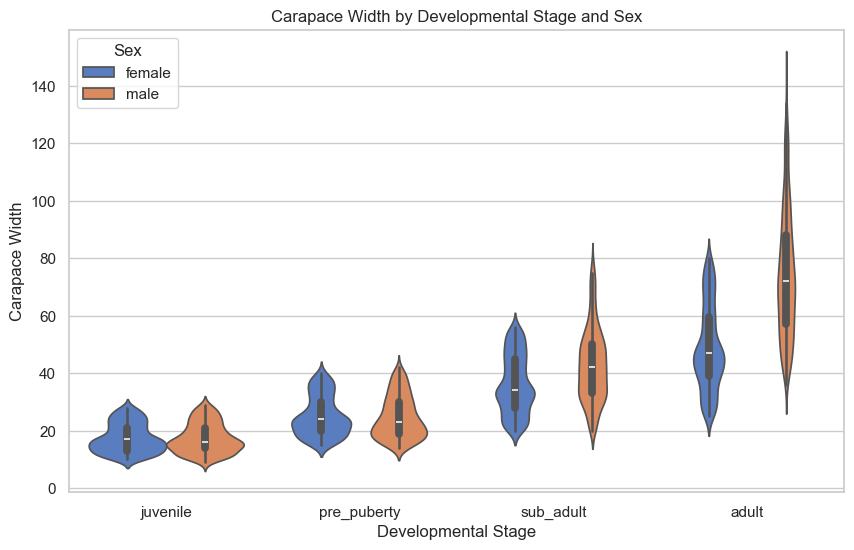

In [22]:
# R code
# crabs %>%
#   drop_na(sex) %>%
#   ggplot(mapping = aes(x = stage, y = carapace_width, fill = sex)) +
#   geom_violin()

# Drop rows where 'sex' is NaN
crabs02 = crabs.dropna(subset=['sex'])

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=crabs, x='stage', y='carapace_width', hue='sex',
               # split=True,
               palette='muted')

# Customize the plot
plt.xlabel('Developmental Stage')
plt.ylabel('Carapace Width')
plt.title('Carapace Width by Developmental Stage and Sex')
plt.legend(title='Sex')
plt.show()

### Density

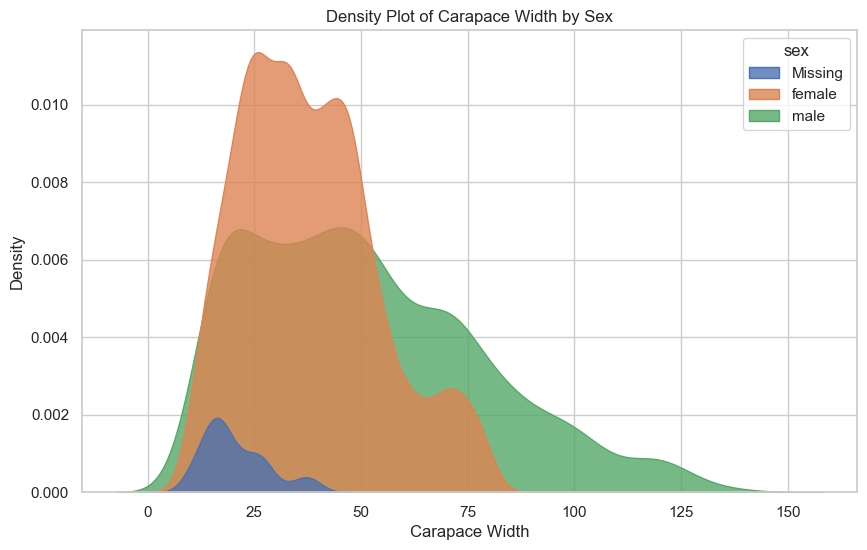

In [19]:
# crabs %>%
#   ggplot(mapping = aes(x = carapace_width, fill = sex)) +
#   geom_density(alpha=0.8)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=crabs01, x='carapace_width', hue='sex', fill=True, alpha=0.8)

# Customize the plot
plt.xlabel('Carapace Width')
plt.ylabel('Density')
plt.title('Density Plot of Carapace Width by Sex')
plt.show()

### Histogram

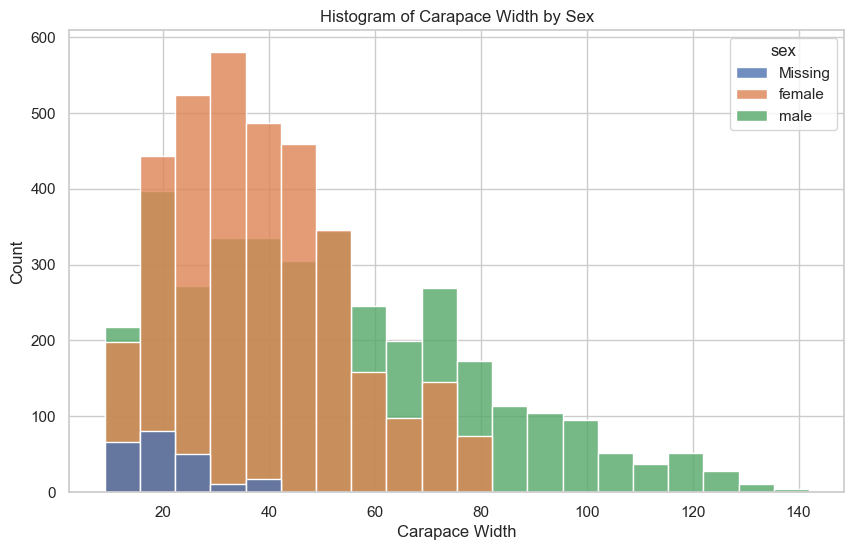

In [31]:
# crabs %>%
#   ggplot(mapping = aes(x = carapace_width, fill = sex, col = sex)) +
#   geom_histogram(alpha=0.8, position = 'identity')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=crabs01, x='carapace_width', hue='sex', fill=True, alpha=0.8, bins=20)

# Customize the plot
plt.xlabel('Carapace Width')
plt.ylabel('Count')
plt.title('Histogram of Carapace Width by Sex')
plt.show()

### Boxplot

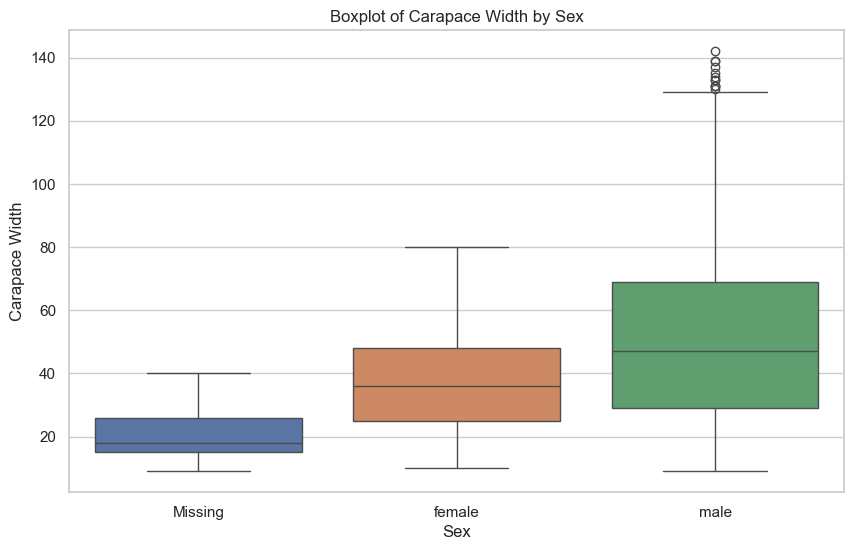

In [32]:
# crabs %>%
#   ggplot(mapping = aes(y = carapace_width, fill = sex)) +
#   geom_boxplot()

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=crabs01, y='carapace_width', x='sex', hue='sex', fill=True)

# Customize the plot
plt.ylabel('Carapace Width')
plt.xlabel('Sex')
plt.title('Boxplot of Carapace Width by Sex')
plt.show()

### Scatter plot

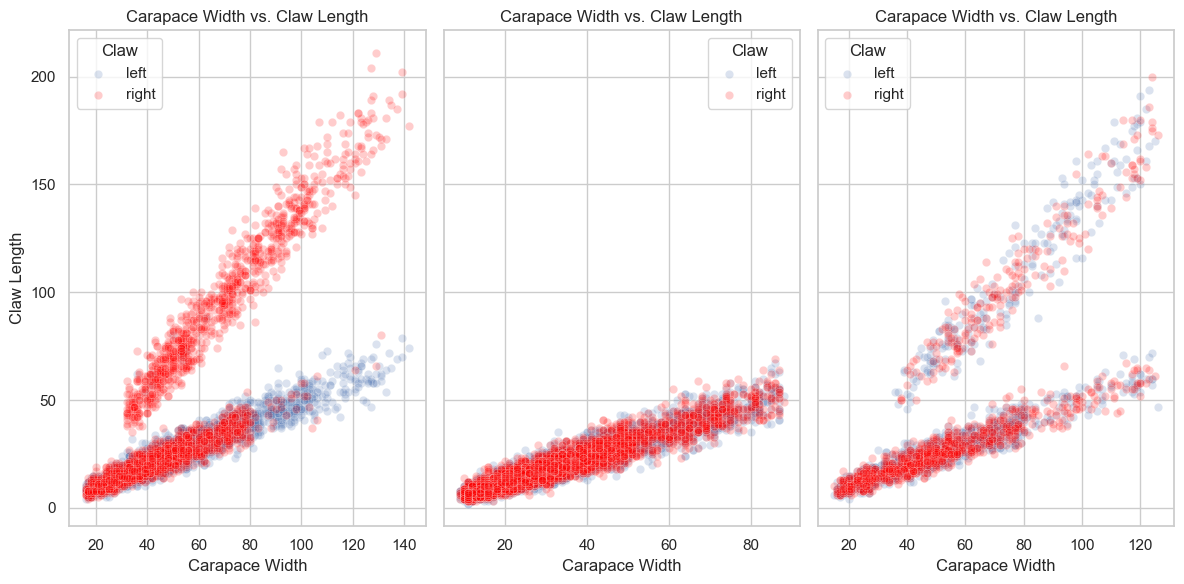

In [55]:
# Create three separate plots using matplotlib and seaborn
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Plot 1: carapace_width vs. left_claw_length
# sns.scatterplot(data=crabs, x='carapace_width', y='left_claw_length',
#                 hue='species', palette='tab10', alpha=0.2, ax=axes[0])
sns.scatterplot(data=crabs[crabs['species']=='Afruca farensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[0], label='left')
sns.scatterplot(data=crabs[crabs['species']=='Afruca farensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[0], color='red', label='right')

axes[0].set_title('Carapace Width vs. Claw Length')
axes[0].set_xlabel('Carapace Width')
axes[0].set_ylabel('Claw Length')
axes[0].legend(title='Claw')

# Plot 2: carapace_width vs. right_claw_length
sns.scatterplot(data=crabs[crabs['species']=='Uca olhanensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[1], label='left')
sns.scatterplot(data=crabs[crabs['species']=='Uca olhanensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[1], color='red', label='right')
axes[1].set_title('Carapace Width vs. Claw Length')
axes[1].set_xlabel('Carapace Width')
axes[1].set_ylabel('Claw Length')
axes[1].legend(title='Claw')

# Plot 3: left_claw_length vs. right_claw_length
sns.scatterplot(data=crabs[crabs['species']=='Ucides alvorensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[2], label='left')
sns.scatterplot(data=crabs[crabs['species']=='Ucides alvorensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[2], color='red', label='right')
axes[2].set_title('Carapace Width vs. Claw Length')
axes[2].set_xlabel('Carapace Width')
axes[2].set_ylabel('Claw Length')
axes[2].legend(title='Claw')

# Adjust layout
plt.tight_layout()
plt.show()

## Saving images

In [57]:
# Save as PNG
fig.savefig('plots/cl_vs_cw.png', bbox_inches='tight')

# Save as PDF
fig.savefig('plots/cl_vs_cw.pdf', bbox_inches='tight')

### Notes
R package `{patchwork}` counterpart in python is `matplotlib` subplots